# DATA SCIENCE INTERNSHIP - BHARAT INTERN

## INTERN NAME - Dharani V

## TASK 1 : STOCK PREDICTION

### AIM : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

### DATASET INFORMATION:


### GOOGLE STOCK PREDICTION

This dataset comprises historical data related to Google's stock prices and various associated attributes. It contains 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

 1. Company Symbol: Represents the name of the company, which, in this case, is GOOG for Google.
 2. Date: Indicates the year and date of the stock data.
 3. Close: Denotes the closing price of Google's stock on a particular day.
 4. High: Represents the highest value reached by Google's stock on the given day.
 5. Low: Represents the lowest value reached by Google's stock on the given day.
 6. Open: Indicates the opening value of Google's stock on the given day.
 7. Volume: Represents the trading volume of Google's stock on the given day, i.e., the number of shares traded.
 8. Adjusted Close: Denotes the adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
 9. Adjusted High: Represents the adjusted highest value reached by Google's stock on the given day.
10. Adjusted Low: Represents the adjusted lowest value reached by Google's stock on the given day.
11. Adjusted Open: Indicates the adjusted opening value of Google's stock on the given day
12. Adjusted Volume: Represents the adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
13. Dividend Cash Amount: Denotes the amount of cash dividend paid out to shareholders on the given day.
14. Split Factor: Represents the split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.

You can find the dataset available on Kaggle at the following link: https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction



### WORKFLOW OVERVIEW:
### This project involves the following steps:

 1. Importing libraries and the dataset to be used for analysis.
 2. Gathering insights from the dataset to understand its structure and contents.
 3. Performing data pre-processing to prepare the data for model training.
 4. Creating an LSTM (Long Short-Term Memory) model for stock price prediction.
 5. Visualizing the actual stock prices vs. the predicted stock prices using the LSTM model.
 6. Utilizing the trained model to predict stock prices for the upcoming 15 days.

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
# Importing libraries for data analysis and visualization
import numpy as np # For linear algebra operations
import pandas as pd # For data preprocessing and manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization
%matplotlib inline

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for machine learning and deep learning
from sklearn.preprocessing import MinMaxScaler # For data normalization
from keras.models import Sequential # For creating a sequential neural network model
from keras.layers import Dense, Dropout, LSTM, Bidirectional # For defining different layers in the neural network


In [2]:
# Data importing: Reading the CSV file into a DataFrame
df = pd.read_csv('/content/GOOG.csv')

# Fetching the first 10 rows of the dataset for quick inspection
df.head(10)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


## STEP 2 : GATHERING INSIGHTS

In [3]:
# Printing the shape of the DataFrame (number of rows and columns)
print("Shape of data:", df.shape)


Shape of data: (1258, 14)


In [4]:
# Computing the statistical description of the DataFrame
df.describe()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
# Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
# checking null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [7]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


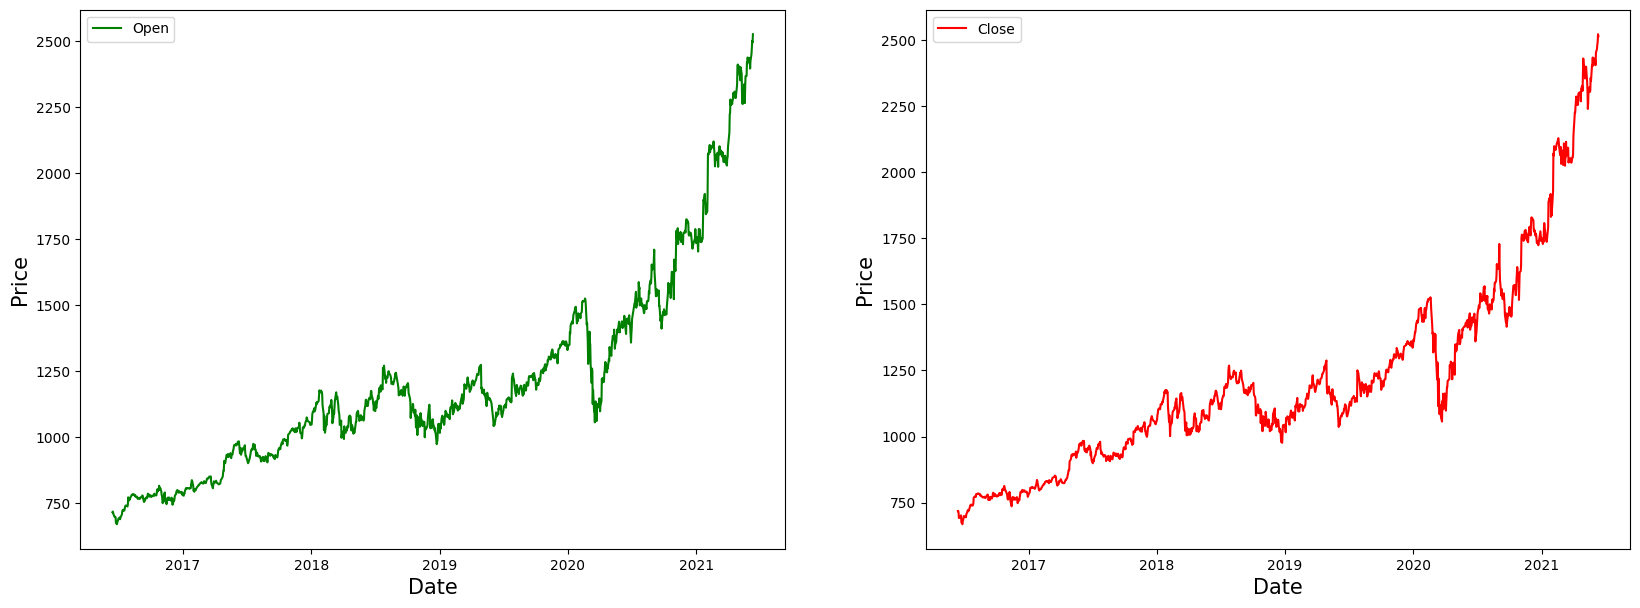

In [8]:
import matplotlib.pyplot as plt

# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plotting the open prices
ax[0].plot(df['open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

# Plotting the closing prices
ax[1].plot(df['close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

# Displaying the plots
plt.show()


## STEP 3 : DATA PRE-PROCESSING

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
MMS = MinMaxScaler()

# Applying Min-Max Scaling to normalize all values in the DataFrame
df[df.columns] = MMS.fit_transform(df)

# Displaying the first 10 rows of the normalized DataFrame
df.head(10)


,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [10]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [11]:
# Assuming 'training_size' has been defined before this code snippet
# and represents the number of rows to be used for training the model.

# Slicing the DataFrame 'df' to create 'train_data' containing the first 'training_size' rows
train_data = df[:training_size]

# Slicing the DataFrame 'df' to create 'test_data' containing the remaining rows after 'training_size'
test_data = df[training_size:]

# Printing the shapes of the newly created 'train_data' and 'test_data'
print(train_data.shape, test_data.shape)


(944, 2) (314, 2)


In [12]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [15]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## STEP 4 :  CREATING LSTM MODEL

In [16]:
# Importing the required modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating a Sequential model
model = Sequential()


# Adding an LSTM layer with 50 units, return_sequences=True is used to pass output to the next LSTM layer
# input_shape represents the shape of input sequences in the format (number_of_timesteps, number_of_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

# Adding a Dropout layer to avoid overfitting (10% of the neurons will be randomly excluded during training)
model.add(Dropout(0.1))

# Adding another LSTM layer with 50 units (return_sequences=False by default for the last LSTM layer)
model.add(LSTM(units=50))

# Adding a Dense layer with 2 neurons (output layer)
model.add(Dense(2))

# Compiling the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Displaying the summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 7s 97ms/step - loss: 0.0063 - mean_absolute_error: 0.0563 - val_loss: 0.0161 - val_mean_absolute_error: 0.1027
Epoch 2/100
28/28 [==============================] - 2s 88ms/step - loss: 6.0634e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0046 - val_mean_absolute_error: 0.0529
Epoch 3/100
28/28 [==============================] - 2s 74ms/step - loss: 4.2541e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0034 - val_mean_absolute_error: 0.0441
Epoch 4/100
28/28 [==============================] - 2s 58ms/step - loss: 4.1480e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0054 - val_mean_absolute_error: 0.0584
Epoch 5/100
28/28 [==============================] - 2s 66ms/step - loss: 4.2416e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0046 - val_mean_absolute_error: 0.0531
Epoch 6/100
28/28 [==============================] - 2s 67ms/step - loss: 4.2820e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0037 - val_mean_absolute_error: 0.0

In [18]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 17ms/step


array([[0.4036651 , 0.4083797 ],
       [0.4032556 , 0.40843308],
       [0.39931744, 0.40484872],
       [0.40317363, 0.40757194],
       [0.40674546, 0.4106346 ]], dtype=float32)

In [19]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1419.3628, 1425.1265],
       [1418.6036, 1425.2255],
       [1411.3026, 1418.5823],
       [1418.4517, 1423.6294],
       [1425.0735, 1429.3055]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [20]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [21]:
# Inversing normalization/scaling
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1419.362793,1425.126465
2020-05-28,1396.86,1416.73,1418.603638,1425.225464
2020-05-29,1416.94,1428.92,1411.302612,1418.582275
2020-06-01,1418.39,1431.82,1418.451660,1423.629395
2020-06-02,1430.55,1439.22,1425.073486,1429.305542


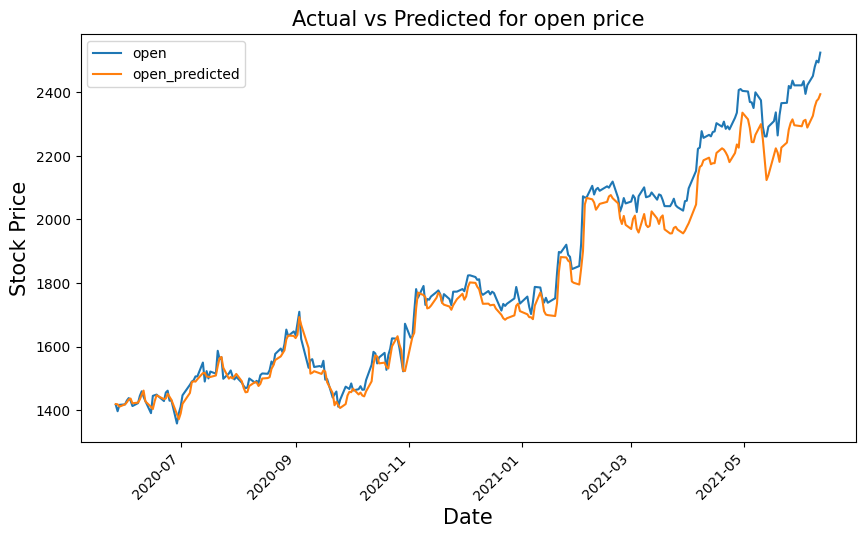

In [22]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

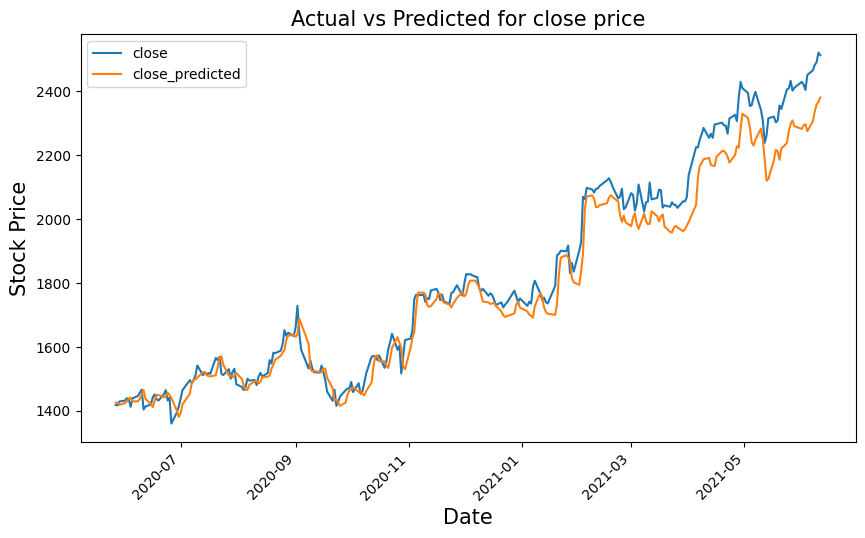

In [23]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [24]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2372.686768,2358.650391
2021-06-10,2494.01,2521.60,2379.389648,2367.907471
2021-06-11,2524.92,2513.93,2394.165039,2381.124512
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [25]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [26]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 31ms/step


In [27]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

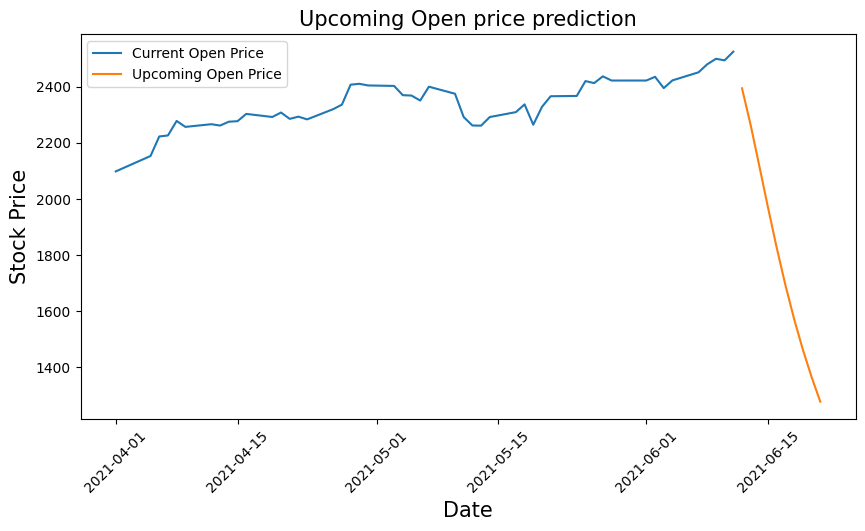

In [28]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

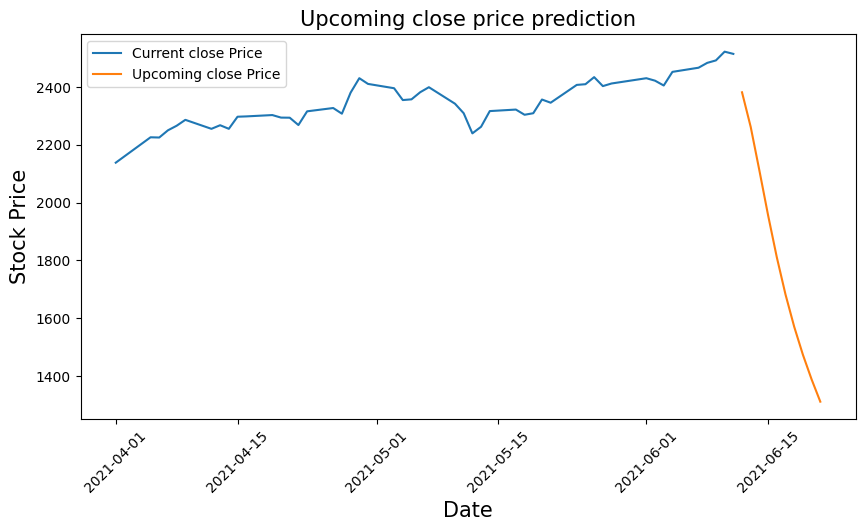

In [29]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()